In [265]:
#all the librarys used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [266]:
df = pd.read_csv("startup_data.csv.xls")
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [267]:
df.size

45227

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Data Type Identification

In [269]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

Categorical data

In [270]:
df_category = df.select_dtypes(include='object')
df_category

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,NaN,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,CA,advertising,c:21343,acquired
919,MA,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,MA,security,c:41747,closed
920,CA,94089,c:31549,Sunnyvale,NaN,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,CA,biotech,c:31549,closed
921,CA,94404,c:33198,San Francisco,NaN,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,CA,software,c:33198,acquired


Numerical Data

In [296]:
def find_numeric(df):
    numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric=df.select_dtypes(include=numeric)
    return df_numeric

Data Cleaning and Pre-processing: It involves finding Null/NaN values, replacing column names, changing data types, dropping unwanted columns and so on

In [272]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


seems like there are lot of negative values present, differences seen between mean and median indicate outlier or skewed distribution

In [273]:
# finding the columns with missing values and its percentage wrt complete dataframe

df_null =pd.DataFrame(df.isnull().sum(), columns =["Null Count"])
# percentage of missing values
df_null["%"] = (df.isnull().sum()/len(df)*100)
df_null = df_null[df_null["%"] > 0]
df_null["Null Count"].sum()
df_null

# there are 1386 missing values in total with 2 columns having > 50% of missing values. 
# This indicates either we can drop this column or imput the missing values
# for columns having less than 50% , it makes sense to imput the missing values.

,Null Count,%
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [274]:
# Unnamed doesnot have much value and closed_at null indicates the company is "acquired". Hence we can drop these 2 columns
df.drop(['Unnamed: 6', 'closed_at'], axis=1, inplace=True)
df.shape

(923, 47)

In [275]:
# for the companies with milestones 0, the age_first_milestone_year and age_last_milestone_year columns have NaN values.
#  So for this we can imput with mean values

df_milestones = df.query('milestones == 0')
df_milestones.loc[:, ['age_first_milestone_year', 'age_last_milestone_year', 'milestones']]

,age_first_milestone_year,age_last_milestone_year,milestones
12,NaN,NaN,0
15,NaN,NaN,0
24,NaN,NaN,0
32,NaN,NaN,0
34,NaN,NaN,0
...,...,...,...
885,NaN,NaN,0
903,NaN,NaN,0
904,NaN,NaN,0
906,NaN,NaN,0


In [276]:
mean_value1=df['age_first_milestone_year'].mean()
mean_value2=df['age_last_milestone_year'].mean()
df["age_first_milestone_year"].fillna(value=mean_value1,inplace=True)
df["age_last_milestone_year"].fillna(value=mean_value2,inplace=True)

In [277]:
df.isnull().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommer

In [278]:
# we see only 1 column has null value, and there is state_code column with same values. hence state_code.1 can be dropped as its a duplicate

df.loc[:, ['state_code.1', 'state_code']]
df.drop(['state_code.1'], axis=1, inplace=True)

In [279]:
df.shape

(923, 46)

We have eliminated all columns with missing values, next we can check columns having invalid data
Invalid data can be: negative values, unmatched datatype, columns with no strong correlation or with no defined meaning

In [280]:
#df.loc[:, ['labels', 'status']]
# these columns not have any valid correlation on the status, so can be dropped

df.loc[:, ['id', 'Unnamed: 0', 'object_id']]
df.drop(['id', 'Unnamed: 0', 'object_id'], axis=1, inplace=True)

In [281]:
df.shape

(923, 43)

In [282]:
# checking for rows with negative values and milestone related colums have negative values.

df_num = find_numeric(df)

for a in range(len(df_num.columns)):
  if df_num.columns[a]=="latitude" or df_num.columns[a]=="longitude":
    pass
  else:
    print("Is there any negative value in '{}' column : {} ".
          format(df_num.columns[a],(df[df_num.columns[a]]<0).any()))



Is there any negative value in 'labels' column : False 
Is there any negative value in 'age_first_funding_year' column : True 
Is there any negative value in 'age_last_funding_year' column : True 
Is there any negative value in 'age_first_milestone_year' column : True 
Is there any negative value in 'age_last_milestone_year' column : True 
Is there any negative value in 'relationships' column : False 
Is there any negative value in 'funding_rounds' column : False 
Is there any negative value in 'funding_total_usd' column : False 
Is there any negative value in 'milestones' column : False 
Is there any negative value in 'is_CA' column : False 
Is there any negative value in 'is_NY' column : False 
Is there any negative value in 'is_MA' column : False 
Is there any negative value in 'is_TX' column : False 
Is there any negative value in 'is_otherstate' column : False 
Is there any negative value in 'is_software' column : False 
Is there any negative value in 'is_web' column : False 
Is t

In [283]:
# we cannot imput mean for the negative values as it will include mean values as well. 
# so we can drop those rows considering them as invalid

df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [284]:
df.shape

(840, 43)

In [285]:
# checking datatypes for date related columns

#df[['first_funding_at', 'founded_at', 'last_funding_at']].info()

# converting these columns to datetime type
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
#df.size
df[['first_funding_at', 'founded_at', 'last_funding_at']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 922
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_funding_at  840 non-null    datetime64[ns]
 1   founded_at        840 non-null    datetime64[ns]
 2   last_funding_at   840 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 26.2 KB


Since there are lot of data, there could be potential outliers. Its a good practice to check it and drop those values if necessary

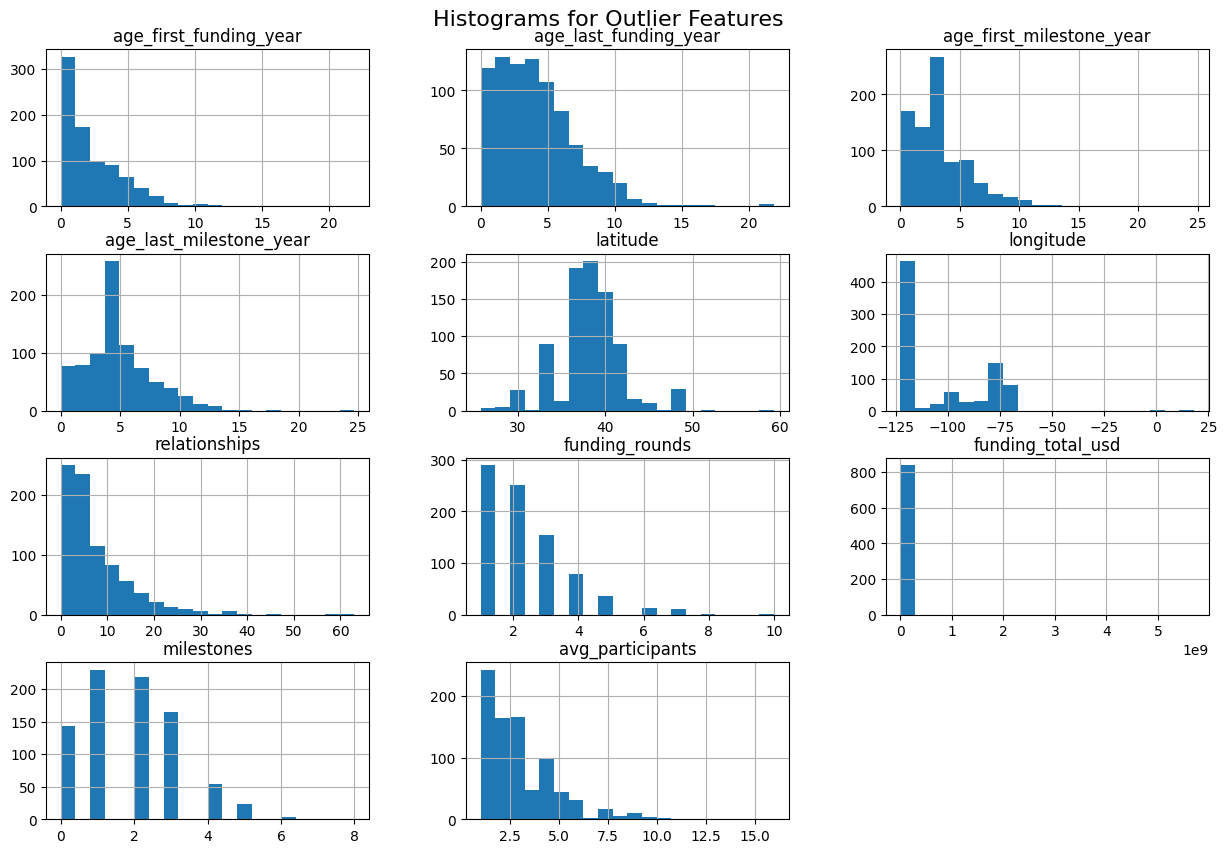

In [286]:
outlier = ["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year", "latitude", "longitude", 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

df[outlier].hist(bins=20, figsize=(15, 10), density=False)
plt.suptitle('Histograms for Outlier Features', x=0.5, y=0.92, fontsize=16)
plt.show()

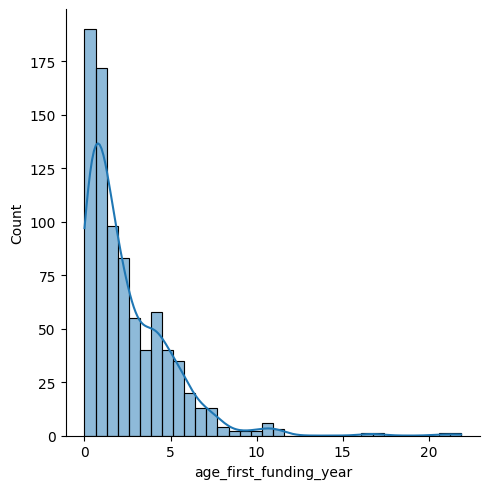

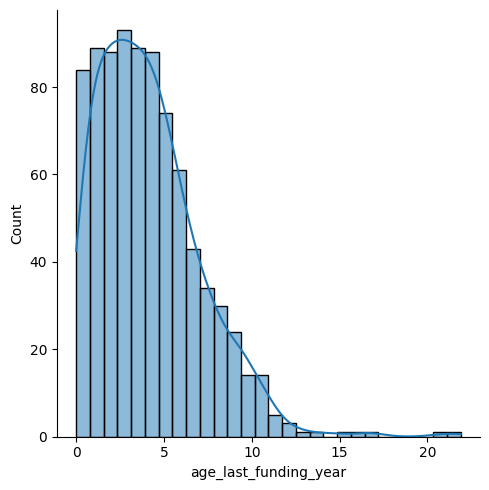

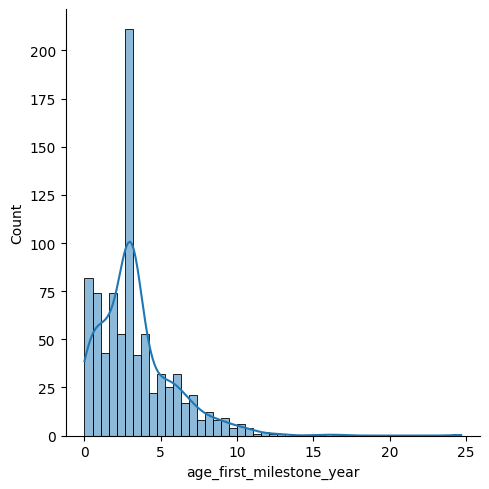

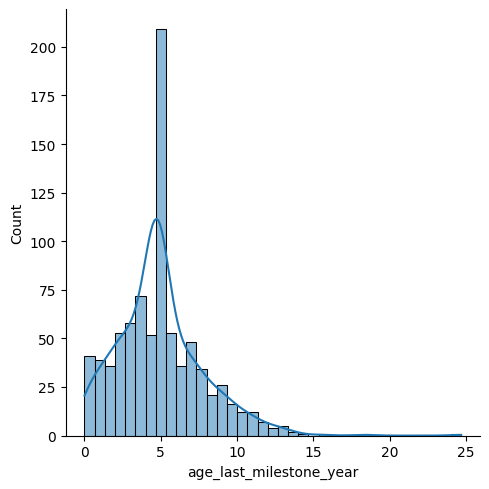

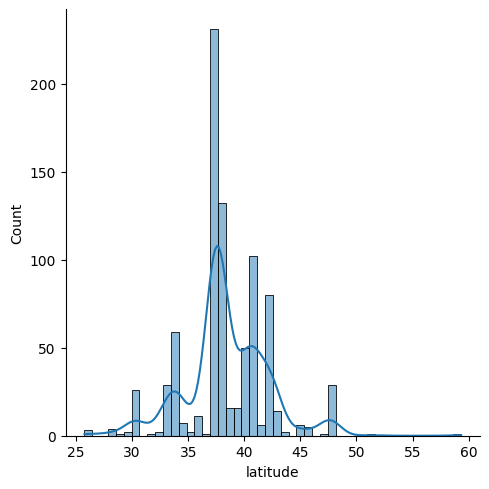

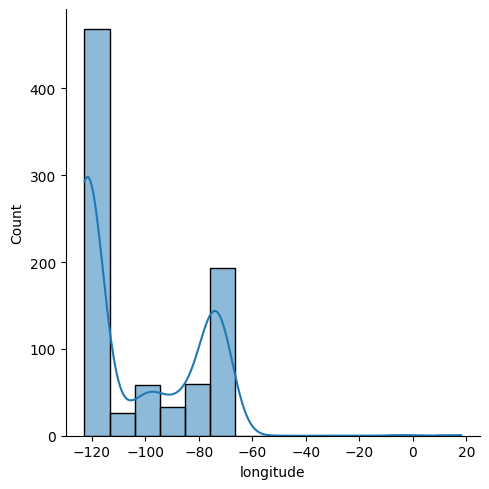

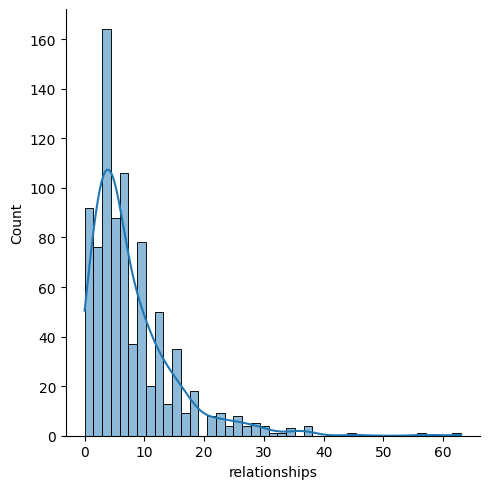

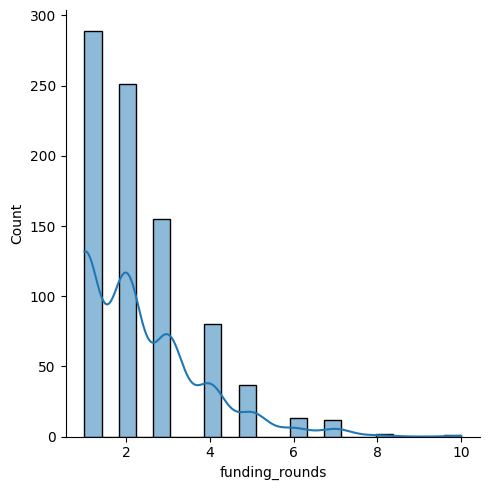

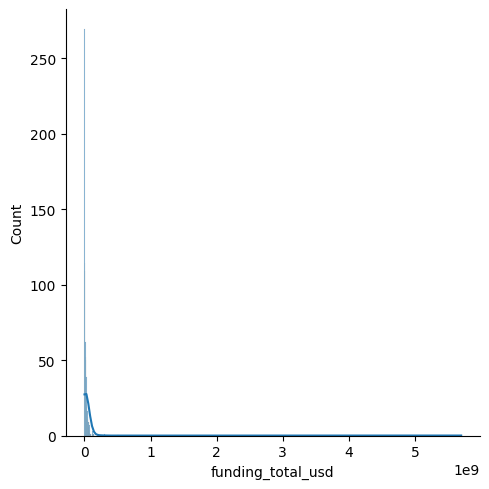

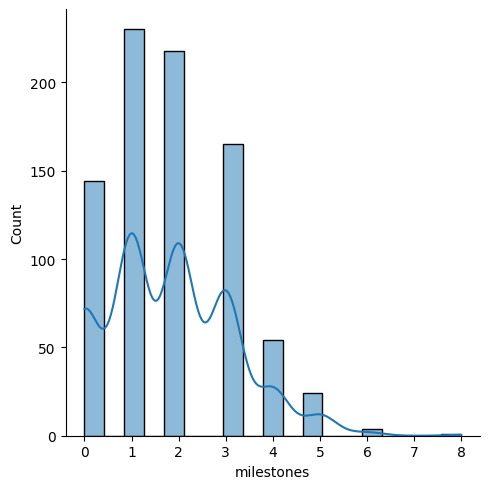

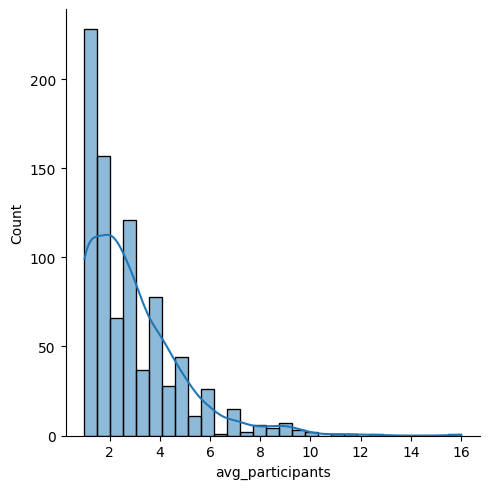

In [287]:
for i in outlier:
  sns.displot(df[i], kde=True)
  plt.show()

Number of outliers in age_first_funding_year: 4
Number of outliers in age_last_funding_year: 4
Number of outliers in age_first_milestone_year: 3
Number of outliers in age_last_milestone_year: 2
Number of outliers in latitude: 1
Number of outliers in longitude: 2
Number of outliers in relationships: 7
Number of outliers in funding_rounds: 3
Number of outliers in funding_total_usd: 1
Number of outliers in milestones: 1
Number of outliers in avg_participants: 4


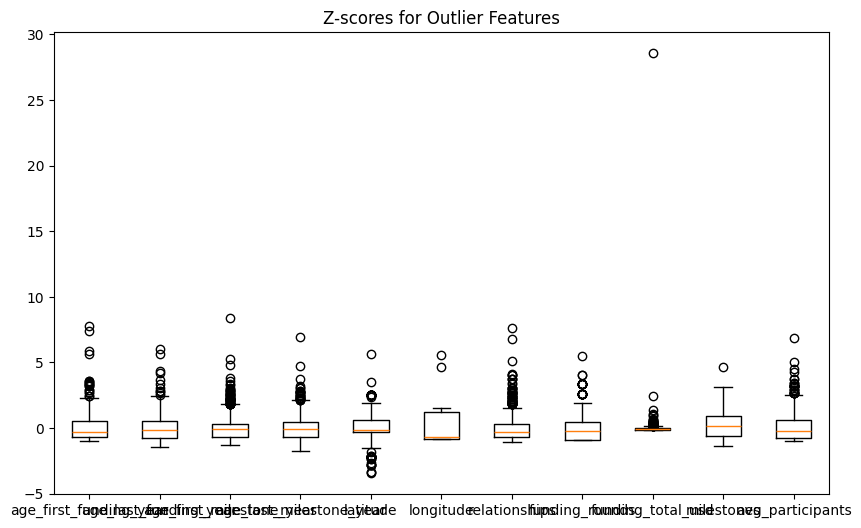

In [288]:
# to get the counts of total outliers for all columns, we can calculate Zscores
from scipy.stats import zscore

z_scores = zscore(df[outlier])
z_score_threshold = 4

outliers_count = (z_scores > z_score_threshold).sum(axis=0)

# Display the count of outliers for each feature
for feature, count in zip(outlier, outliers_count):
    print(f"Number of outliers in {feature}: {count}")

# visualizing Z scores
plt.figure(figsize=(10, 6))
plt.boxplot(z_scores, labels=outlier)
plt.title("Z-scores for Outlier Features")
plt.show()


In [289]:
for i in outlier:
  print(df[i].skew())

2.329300647780428
1.218519581073955
1.7936741337416173
1.0331135978833794
0.1986926853628681
0.774360121966471
2.322944056445443
1.364436574174415
27.835663110176245
0.5816307709668989
1.7582525792116943


In [290]:
# not sure if this steps needs to be perfomed

def remove_outliers(df, columns_to_remove_outliers):
 for i in range(0, len(columns_to_remove_outliers)):
   q1 = df[columns_to_remove_outliers[i]].quantile(0.25)
   q3 = df[columns_to_remove_outliers[i]].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   cleaned_data = df[(df[columns_to_remove_outliers[i]] >= lower_bound) & 
                     (df[columns_to_remove_outliers[i]] <= upper_bound)]
   return cleaned_data

columns_to_remove_outliers=['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

new_df=remove_outliers(df,columns_to_remove_outliers)
print(new_df.shape)

(771, 43)


In [321]:
#visualizing on global map

import folium

latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial], 
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in new_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)

map

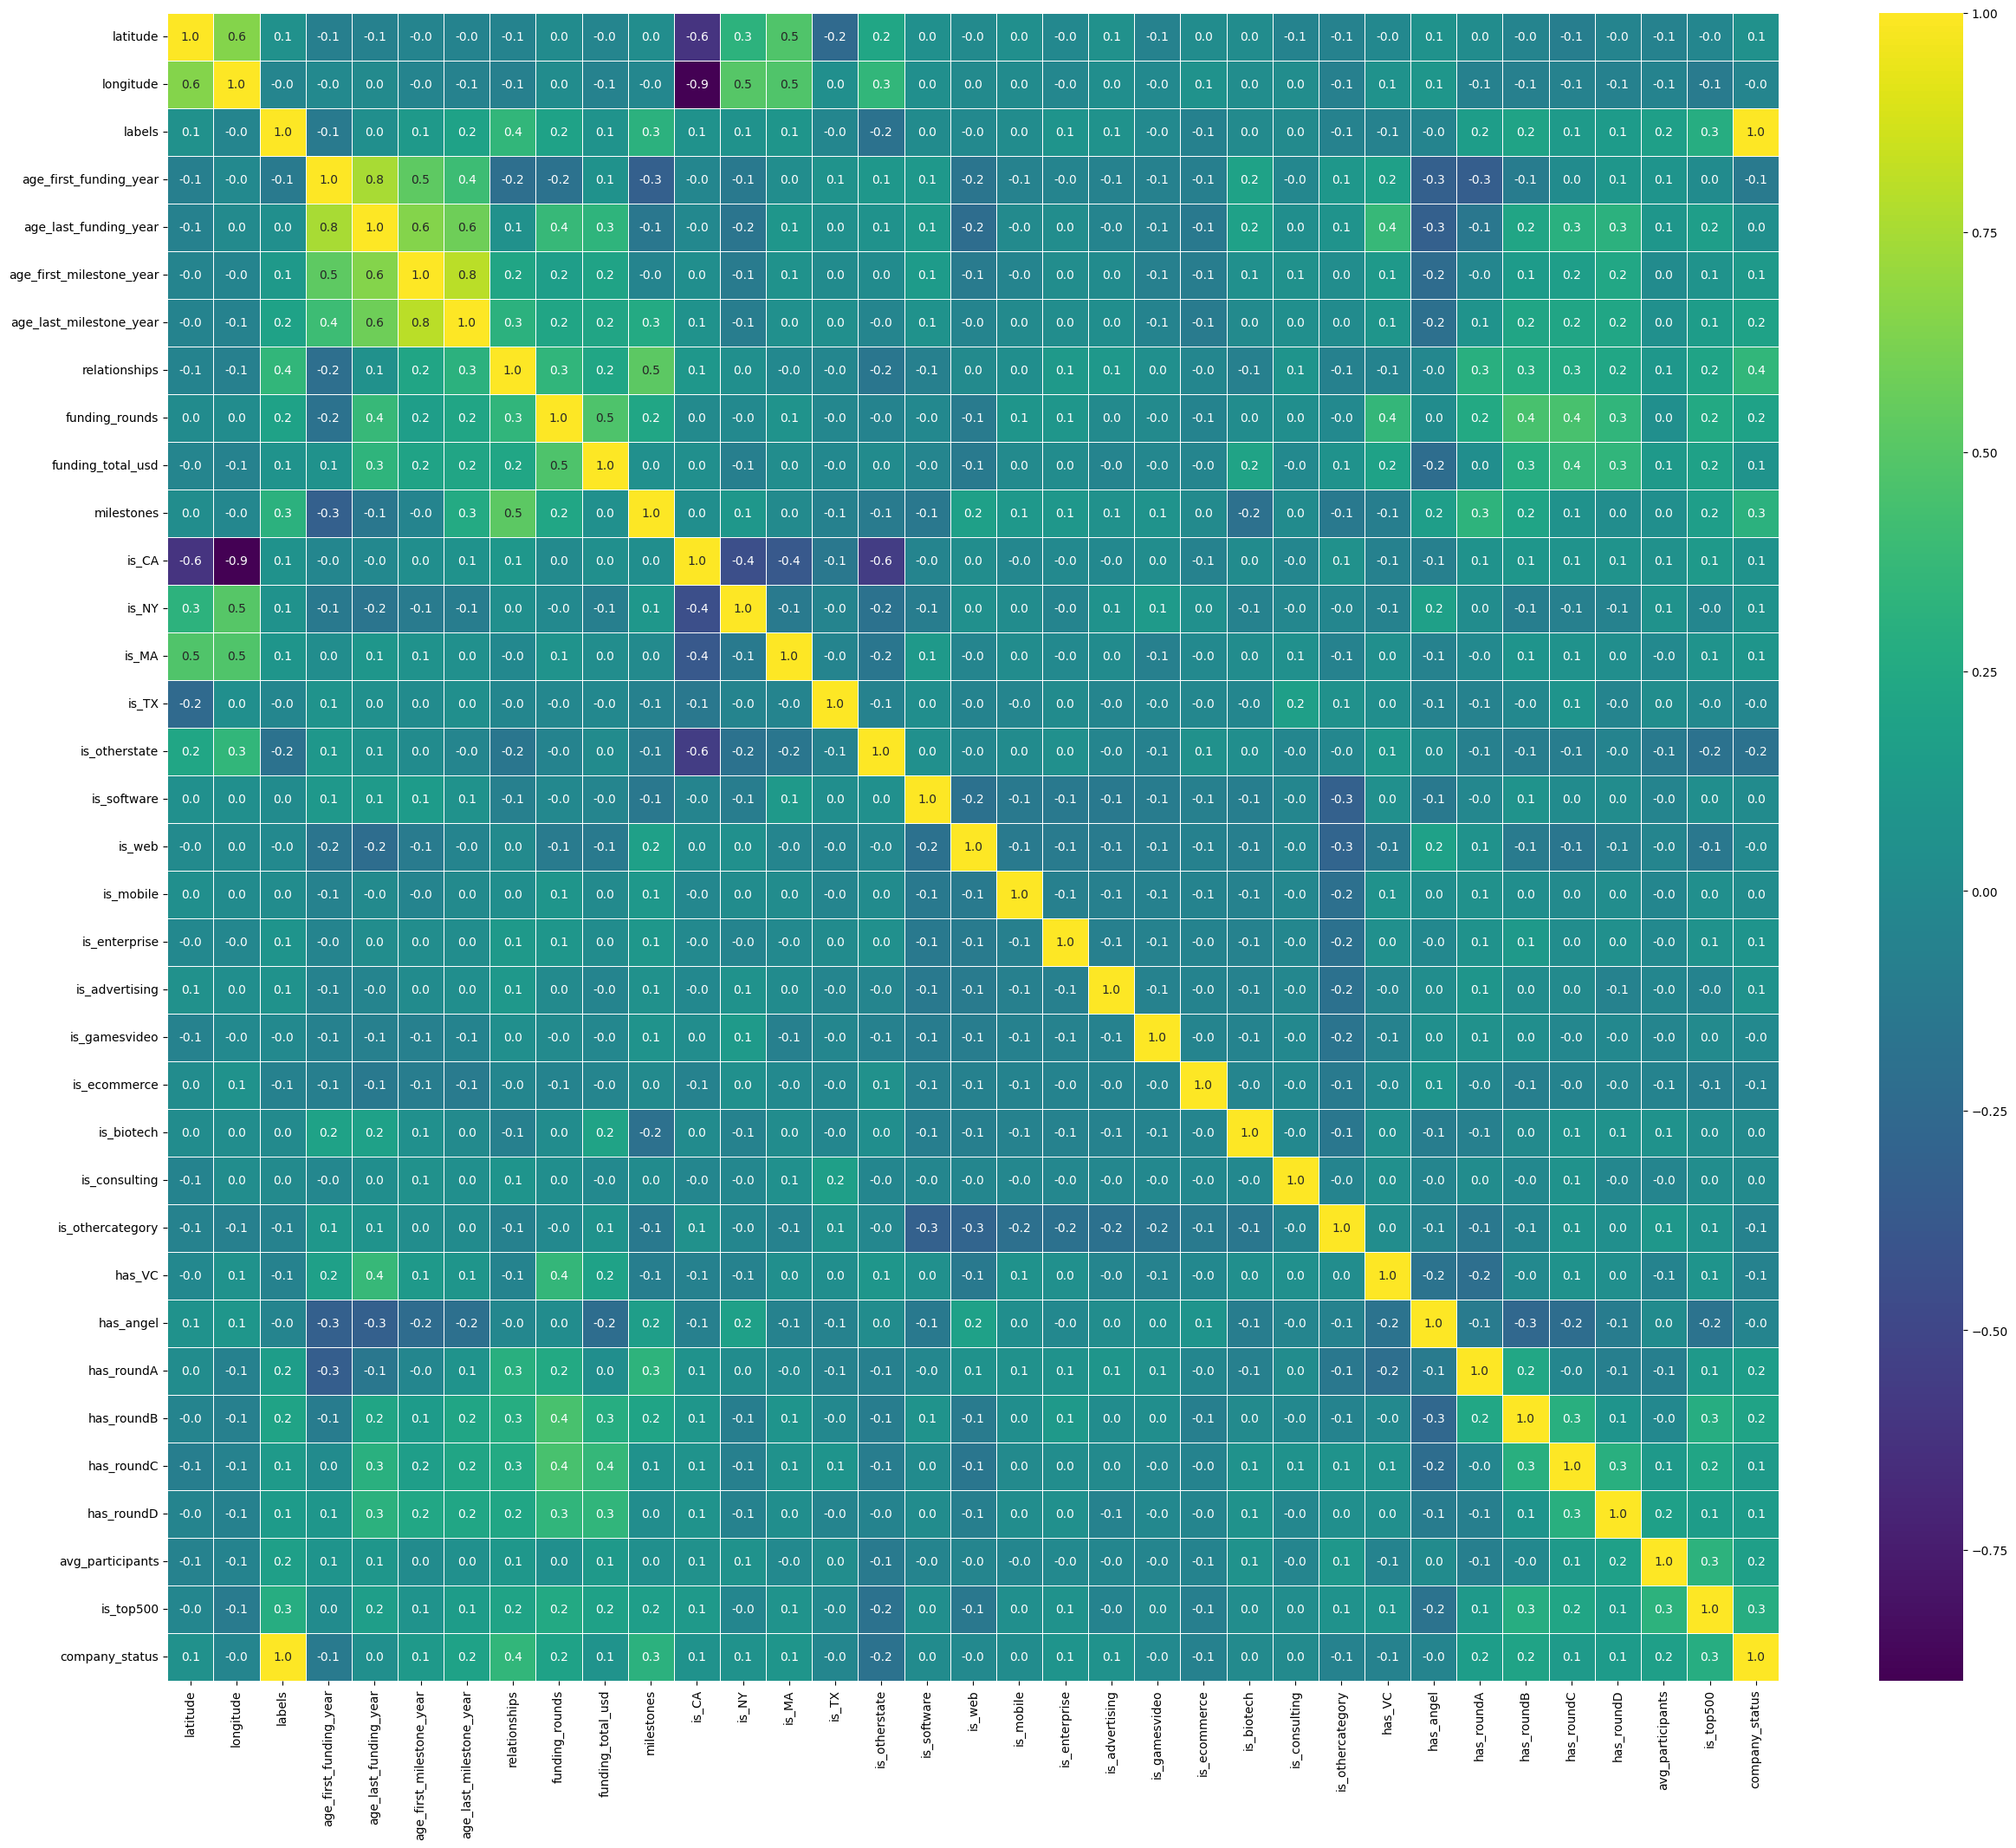

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'labels', 'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status',
       'company_status'],
      dtype='object')

In [307]:
#df_numeric = new_df.select_dtypes(include=['number'])
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric=new_df.select_dtypes(include=numeric)

plt.figure(figsize = (30, 25))
sns.heatmap(df_numeric.corr(),annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')
plt.show()

new_df.columns

In [305]:
new_df['company_status'] = new_df['status']
new_df['company_status'] = new_df['company_status'].replace('acquired', 1)
new_df['company_status'] = new_df['company_status'].replace('closed', 0)
new_df.head(5)
new_df.drop('status', axis=1)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,company_status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,1,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,0,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,0,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,...,0,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,...,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1,2009-01-01,2009-07-09,2009-07-09,...,0,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,0,1998-01-01,2005-04-01,2007-03-23,...,1,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,0,1999-01-01,2007-06-29,2007-06-29,...,0,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1,2009-01-01,2009-10-05,2011-11-01,...,0,0,0,1,1,0,0,1.0000,1,1


In [318]:
# #number of variables for heatmap
# features = df_numeric.columns
# cols = df[features].corr().nlargest(10,'company_status')['company_status'].index
# cm = np.corrcoef(df[cols].values.T) 
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

correlation_matrix = df_numeric.corr()

# Extract the correlation values for 'company_status' column
correlation_with_status = correlation_matrix['company_status']

# Get the absolute values of correlations and sort them in descending order
sorted_correlations = correlation_with_status.abs().sort_values(ascending=False)

# Select the top 10 features
top_10_features = sorted_correlations[2:12].index  # Exclude 'company_status' itself

# Display the top 10 features
print("Top 10 features:")
print(top_10_features)

Top 10 features:
Index(['relationships', 'milestones', 'is_top500', 'has_roundB',
       'age_last_milestone_year', 'funding_rounds', 'is_otherstate',
       'avg_participants', 'has_roundA', 'has_roundD'],
      dtype='object')


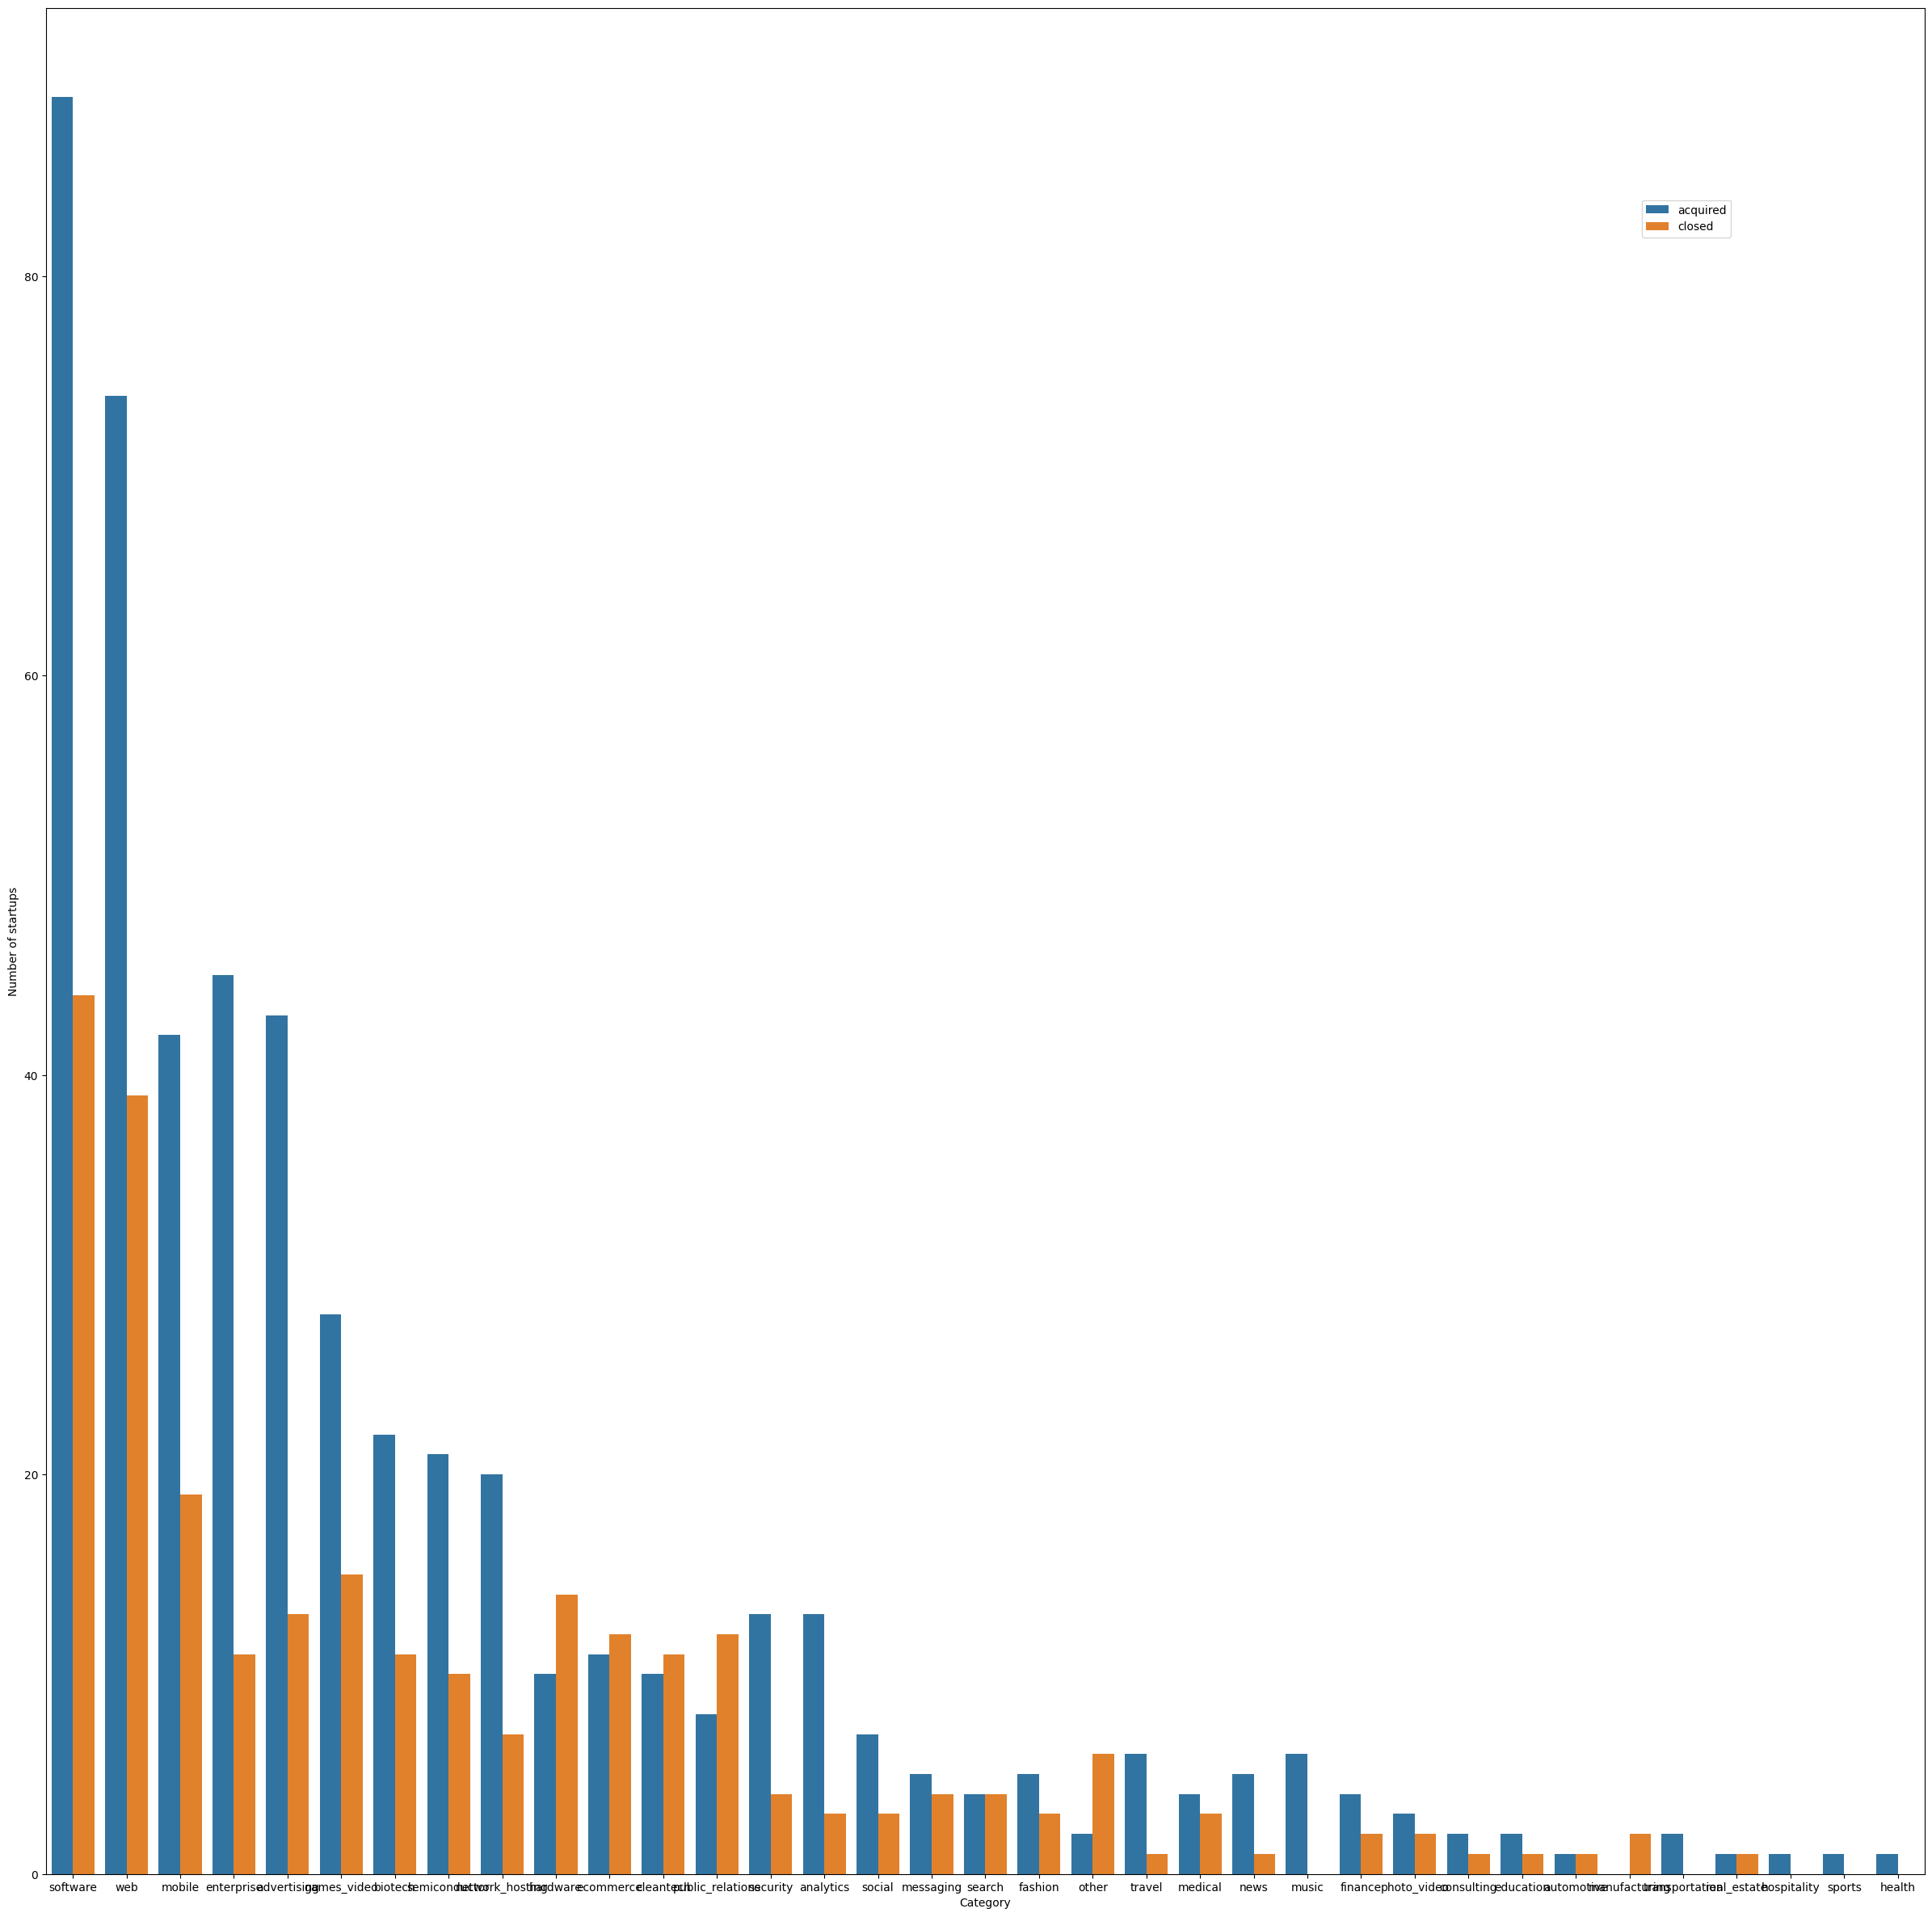

In [ ]:
#category having largest number of startup
fig,ax = plt.subplots(figsize=(30,30))

plot = sns.countplot(x='category_code',hue='status', data=new_df, order= new_df.category_code.value_counts().index)
plot = ax.set(xlabel="Category", ylabel="Number of startups")
plt.legend(bbox_to_anchor=(0.9,0.9))

/var/folders/33/q1vztmhj0vl11x345y8bwnmc0000gq/T/ipykernel_19819/2721955651.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


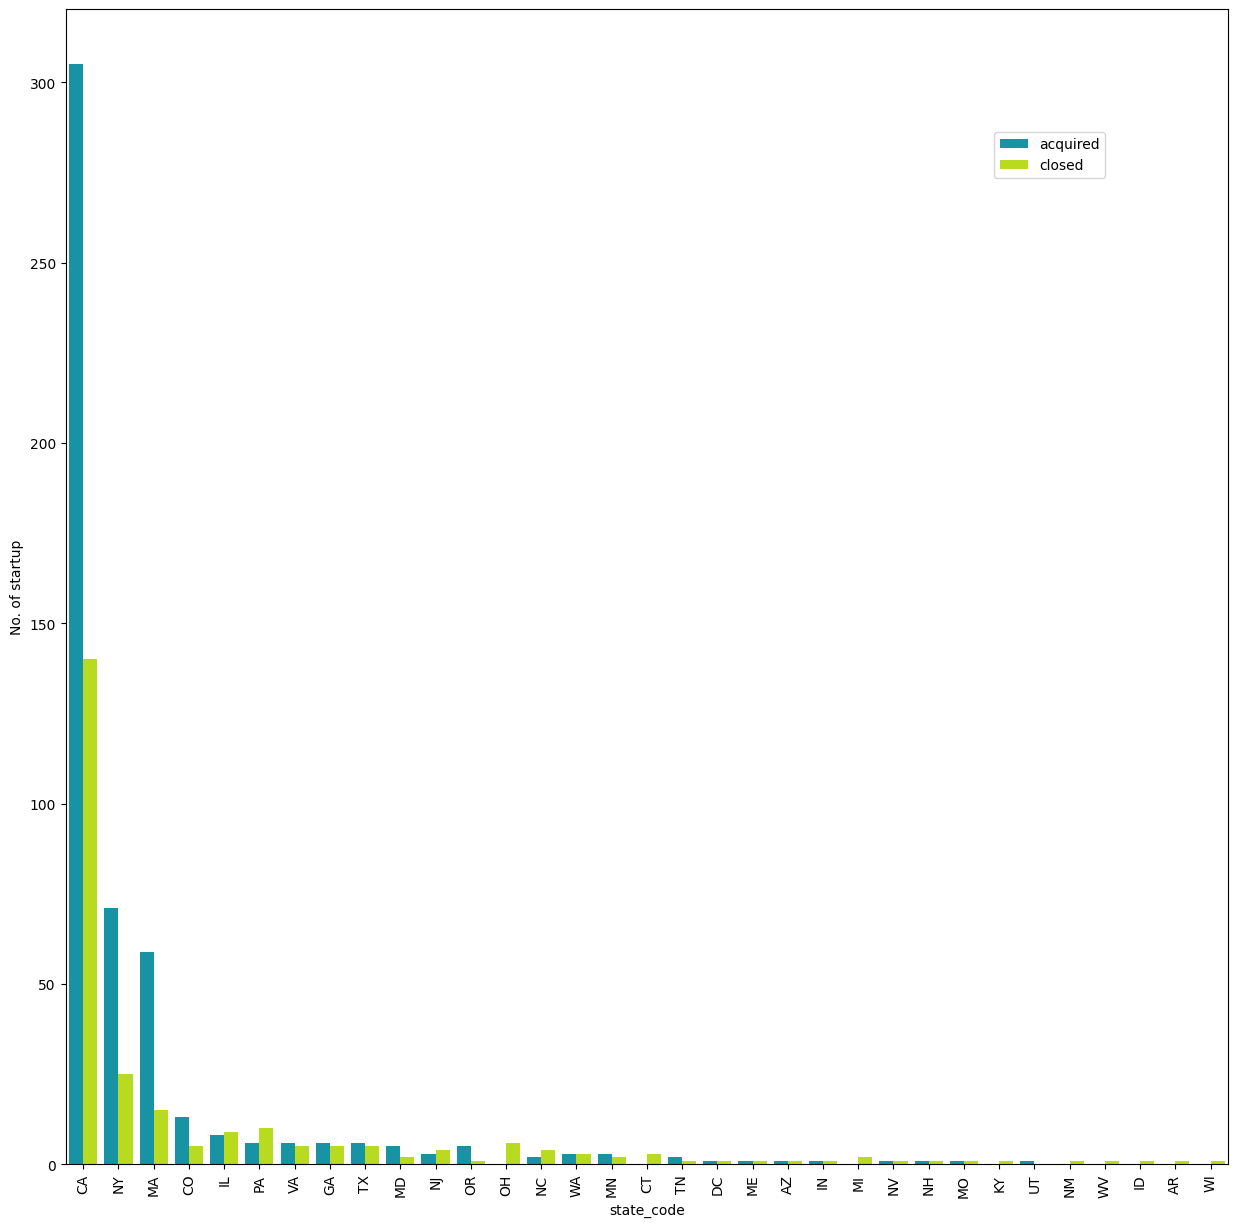

In [ ]:
#state having most number of startup
fig, ax = plt.subplots(figsize=(15,15))

_ = sns.countplot(x="state_code", hue="status", data=new_df, palette="nipy_spectral",
              order=new_df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.9, 0.9))

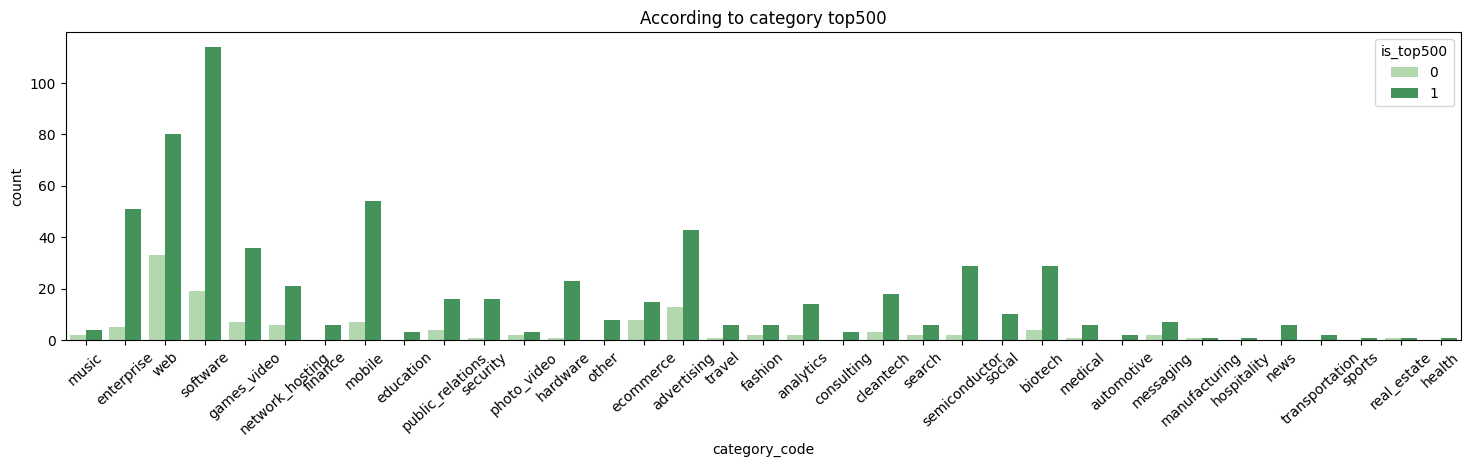

In [ ]:
# finding relation between category and the top 500 company

plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category top500")
sns.countplot(x=new_df["category_code"], hue=new_df["is_top500"], palette="Greens");

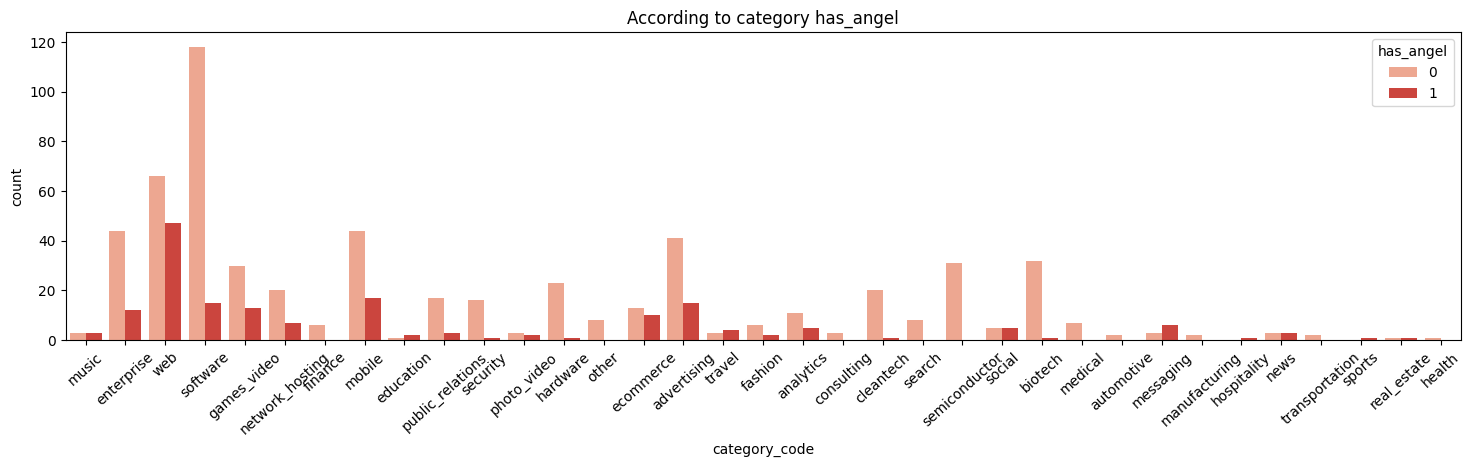

In [ ]:
# finding category having more Angel investors

plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category has_angel")
sns.countplot(x=new_df["category_code"], hue=new_df["has_angel"], palette="Reds");

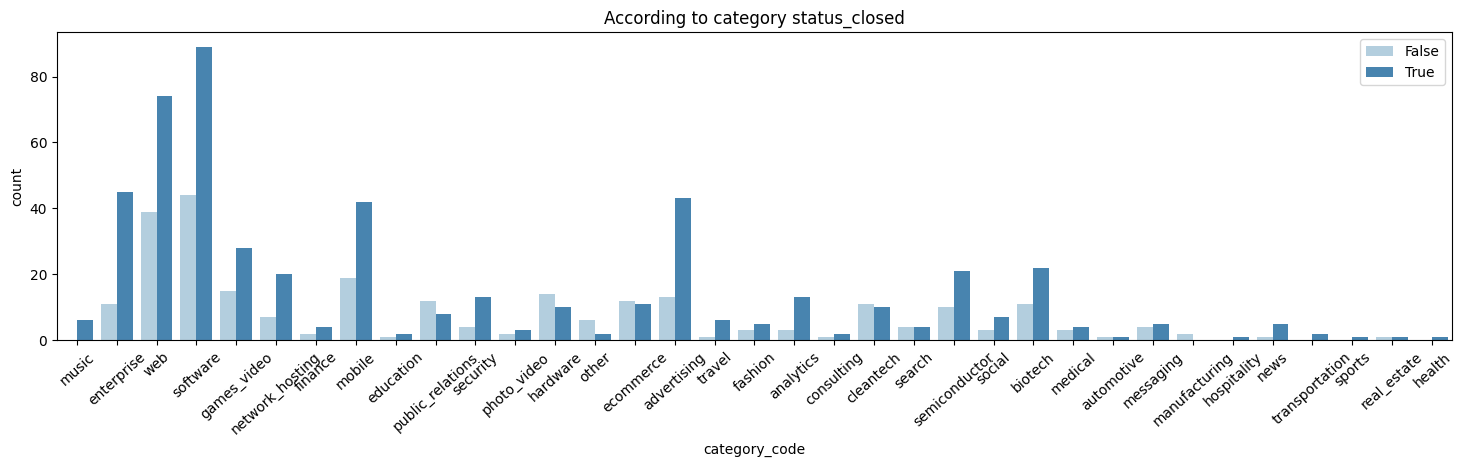

In [ ]:
# checking count of company closed in each category

plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category status_closed")
sns.countplot(x=new_df["category_code"], hue=new_df['labels'].eq(1), palette="Blues")
plt.legend(loc=1);

<Axes: xlabel='funding_rounds', ylabel='count'>

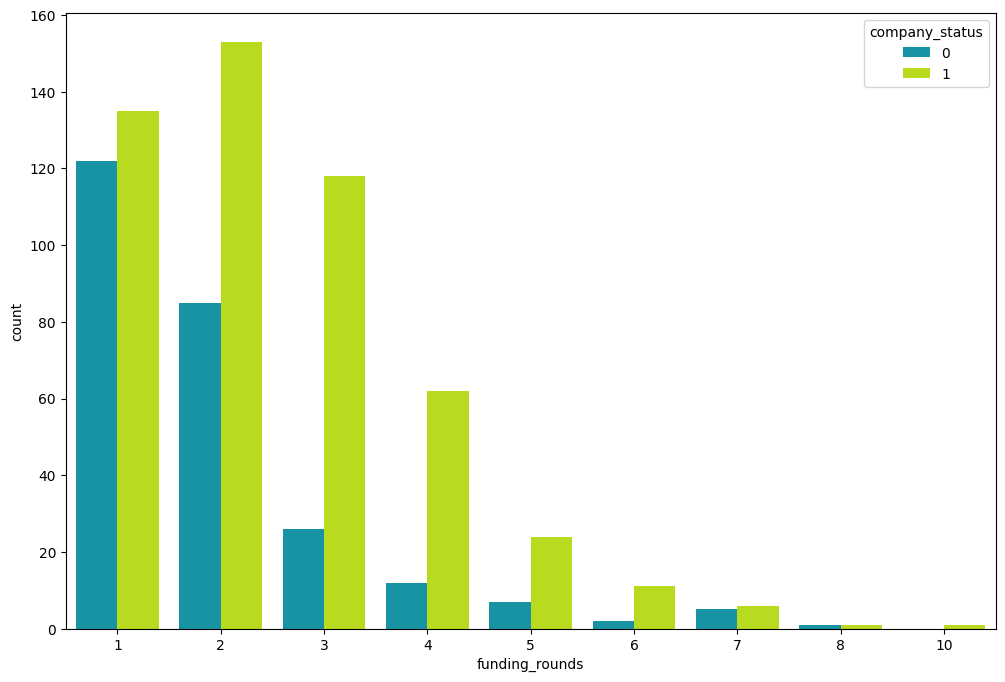

In [ ]:
#which funding_rounds related to acquired or closed startup?

fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="company_status", data=new_df, palette="nipy_spectral",
              order=new_df.funding_rounds.value_counts().index)

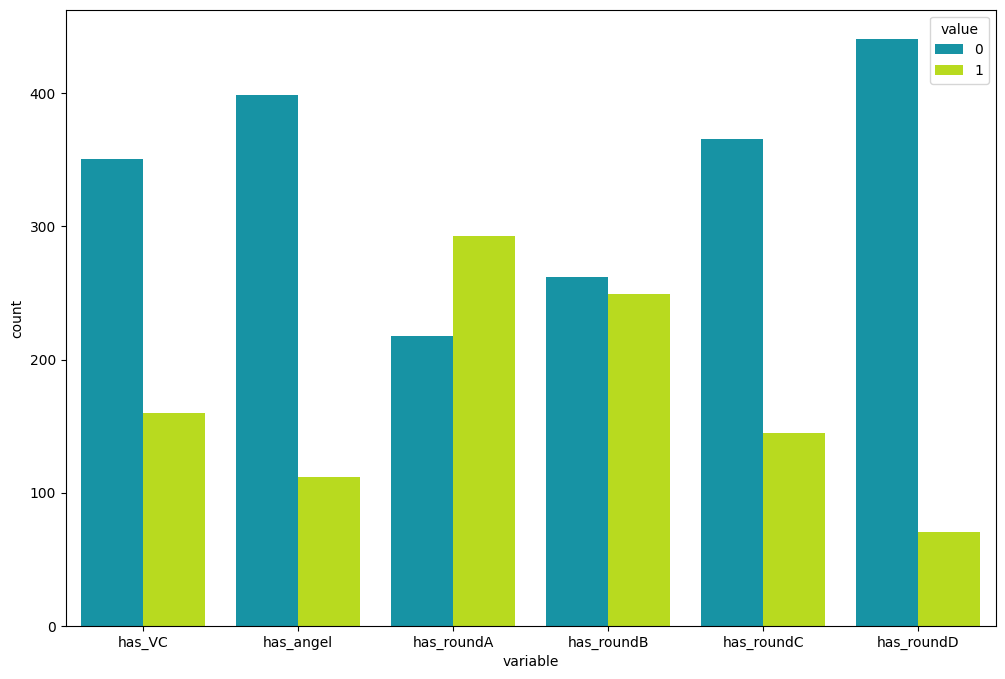

In [ ]:
#Investing Feature on Acquired¶

coba =new_df[(new_df["company_status"] == 1)]

features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

In [ ]:
df_acquired = new_df[(new_df["status"] == 'acquired')]
df_acquired.shape

(511, 43)

In [ ]:
df_closed = new_df[(new_df["status"] == 'closed')]
df_closed.shape

(260, 43)

In [ ]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

/var/folders/33/q1vztmhj0vl11x345y8bwnmc0000gq/T/ipykernel_19819/348129441.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]


,state_code,category_code,num_startup
26,CA,software,50
65,MA,software,15
103,NY,web,12
36,CO,software,4
47,IL,software,4
124,VA,software,2
119,TX,public_relations,2
123,VA,mobile,2
125,VA,web,2
40,GA,enterprise,2


In [ ]:
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

/var/folders/33/q1vztmhj0vl11x345y8bwnmc0000gq/T/ipykernel_19819/1066734497.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]


,state_code,category_code,num_startup
27,CA,web,21
56,MA,software,8
87,NY,web,6
106,TX,software,3
48,IL,web,3
40,GA,software,2
110,VA,web,2
73,NJ,software,2
97,PA,games_video,2
89,OH,ecommerce,2


In [ ]:
new_df['company_status'] = new_df['status']
new_df['company_status'] = new_df['company_status'].replace('acquired', 1)
new_df['company_status'] = new_df['company_status'].replace('closed', 0)
new_df.head(5)
new_df.drop('status', axis=1)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,company_status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,1,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,0,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,0,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,...,0,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,...,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1,2009-01-01,2009-07-09,2009-07-09,...,0,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,0,1998-01-01,2005-04-01,2007-03-23,...,1,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,0,1999-01-01,2007-06-29,2007-06-29,...,0,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1,2009-01-01,2009-10-05,2011-11-01,...,0,0,0,1,1,0,0,1.0000,1,1


In [ ]:
new_df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'labels', 'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status',
       'company_status'],
      dtype='object')

In [ ]:
for index, row in new_df.iterrows():
    if row['labels']!=row['company_status']:
        print(index, row['labels'], row['status'])

In [ ]:
#drop feature
new_df.drop(["labels"], axis=1, inplace=True)

In [ ]:
new_df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status',
       'company_status'],
      dtype='object')

Final Features selection and Modeling

In [ ]:
# The most relational columns with target variable(company_status = 0) are below:

plt.figure(figsize=(4,8),dpi=100)

focus_cols = ['company_status']
#cols_numeric = focus_cols.select_dtypes(include=['number'])

# df_corr=new_df.corr().filter(focus_cols).drop(focus_cols)
# sns.heatmap(df_corr, annot=True, fmt='.2f');

<Figure size 400x800 with 0 Axes>

In [ ]:
new_df['company_status'].dtype

dtype('int64')

In [ ]:
def find_numeric(new_df):
    numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    final_df=new_df.select_dtypes(include=numeric)
    return final_df

final_df = find_numeric(new_df)

In [294]:
df_category = new_df.select_dtypes(include='object')
df_category

,state_code,zip_code,city,name,category_code,status
0,CA,92101,San Diego,Bandsintown,music,acquired
1,CA,95032,Los Gatos,TriCipher,enterprise,acquired
2,CA,92121,San Diego,Plixi,web,acquired
3,CA,95014,Cupertino,Solidcore Systems,software,acquired
4,CA,94105,San Francisco,Inhale Digital,games_video,closed
...,...,...,...,...,...,...
918,CA,94107,San Francisco,CoTweet,advertising,acquired
919,MA,1803,Burlington,Reef Point Systems,security,closed
920,CA,94089,Sunnyvale,Paracor Medical,biotech,closed
921,CA,94404,San Francisco,Causata,software,acquired


In [316]:
new_df.columns
new_df['latitude'].dtypes

dtype('float64')

In [ ]:
final_df.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'company_status'],
      dtype='object')

In [295]:
df_category.columns

Index(['state_code', 'zip_code', 'city', 'name', 'category_code', 'status'], dtype='object')

In [320]:
from sklearn.model_selection import train_test_split

X = final_df.drop(['company_status'], axis=1)

y = final_df['company_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# new_df.columns

In [ ]:
# new_df = new_df.drop(['state_code'],axis=1)
# new_df = new_df.drop(['zip_code'],axis=1)
# new_df = new_df.drop(['founded_at'],axis=1)
# # new_df = new_df.drop(['closed_at'],axis=1)
# new_df = new_df.drop(['first_funding_at'],axis=1)
# new_df = new_df.drop(['last_funding_at'],axis=1)
# new_df = new_df.drop(['city'],axis=1)
# # new_df = new_df.drop(['Unnamed: 0'],axis=1)
# new_df = new_df.drop(['latitude','longitude'],axis=1)
# new_df = new_df.drop(['relationships'],axis=1)

# new_df = new_df.drop(['name'],axis=1)

In [ ]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (616, 33)
Shape of the y Train : (616,)
Shape of the X test : (155, 33)
Shape of the y test : (155,)


In [ ]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 1.0
Testing Accuracy : 0.8129032258064516


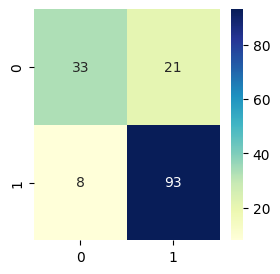

              precision    recall  f1-score   support

           0       0.80      0.61      0.69        54
           1       0.82      0.92      0.87       101

    accuracy                           0.81       155
   macro avg       0.81      0.77      0.78       155
weighted avg       0.81      0.81      0.81       155

------------------------------------------
ROC Curves              = 0.7659515951595159
Precision-Recall Curves = 0.894097228058969


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)